## 노트북 환경 설정하기

이 노트북 환경은 Google Colab에서 제공하는 인터랙티브 개발 환경입니다.

- 먼저 상단 메뉴의 Runtime(런타임) > Change runtime type(런타임 유형변경) 을 눌러
  - Runtime Type(런타임 유형)이 Python3로
  - Hardware Accelerator를 GPU로 설정해주세요.
 
오늘은 구글에서 제공하는 K80 GPU를 사용해 딥러닝을 돌려볼 겁니다.

## 코드 실행하는 법
코드를 입력하는 칸을 cell이라고 하며, 셀은 shift+enter로 실행할 수 있습니다.

## 새로운 셀을 넣고 싶을때
셀 사이에 마우스를 가져다대면 code / text 메뉴가 활성화됩니다.
여기서 code를 선택하면 새로운 셀이 열립니다.

## 셀을 지우고 싶을때
셀을 마우스 좌클릭해서 활성화시키면 오른쪽 끝에 쓰레기통이 나옵니다. 그걸 누릅니다.

## 처음부터 다시 시작하고 싶을때
상단 메뉴의 Runtime(런타임) > Restart Runtime(런타임 재시작)을 누르시면 됩니다.


  

In [1]:
print("hello world")

hello world


## 아래 코드를 실행시켜주세요.

In [1]:
!git clone https://github.com/junkwhinger/pytorch_jupyter 

fatal: destination path 'pytorch_jupyter' already exists and is not an empty directory.


In [2]:
!ls pytorch_jupyter

best_model.pth.tar  data  Dockerfile  img  part1.ipynb	requirements.txt


In [3]:
!pip3 install -U torch torchvision
!pip install --no-cache-dir -I pillow==5.1.0

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (0.4.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.2.1)
Requirement not upgraded as not directly required: pillow>=4.1.1 in /usr/local/lib/python3.6/dist-packages (from torchvision) (5.1.0)
Requirement not upgraded as not directly required: six in /usr/local/lib/python3.6/dist-packages (from torchvision) (1.11.0)
Requirement not upgraded as not directly required: numpy in /usr/local/lib/python3.6/dist-packages (from torchvision) (1.14.3)
    100% |████████████████████████████████| 2.0MB 10.3MB/s 


In [4]:
import PIL
print(PIL.__version__)

5.1.0


In [0]:
# torch.__version__이 0.4.0이 나오면 준비완료입니다!
import torch
print(torch.__version__)

# 딥러닝: 손글씨 인식 웹앱 만들기

## 손글씨 데이터셋 살펴보기
이번 넥슨토크에서 사용할 손글씨 데이터셋은 MNIST라는 데이터셋으로, 딥러닝 분야의 유명 석학인 얀 르쿤(Yann Lecun)와 그 동료들이 공개한 데이터셋입니다.


| ![image](https://docs.google.com/uc?export=download&id=1MIT9cFxssJaJqlFxuwb3HbDpwAnepQDQ) |
| :--: |
| * 얀 르쿤 * |
 
MNIST 데이터셋은 0~9까지의 이미지와 숫자(정답)로, Training 데이터셋에는 6만개, Test 데이터셋은 1만개의 데이터로 구성되어 있습니다.

딥러닝 오픈소스 라이브러리인 PyTorch에는 MNIST를 포함한 여러 데이터셋이 들어있습니다. 아래 코드를 실행해서 MNIST 데이터셋을 가져와봅시다 +_+


#### 필요한 라이브러리를 가져옵니다.

In [0]:
import torch #파이토치
import torchvision.datasets as vdatasets #데이터셋 모음
import torchvision.utils as vutils #유틸리티함수
import torchvision.transforms as vtransform #변환함수

import numpy as np #수치연산
import matplotlib.pyplot as plt #시각화
%matplotlib inline

#### PyTorch에서 데이터셋을 내려받습니다.

In [0]:
# 원본 데이터셋은 PIL 이미지인 관계로,
# 각 이미지의 크기를 가로세로 28x28로 맞춰주고
# 모델이 이해할 수 있도록 숫자로 바꿔주는 함수를 먼저 정의합니다.
# 이를 바로 다음 셀에서 파라미터로 넘겨줍니다.
transform = vtransform.Compose(
    [vtransform.Resize((28,28))
    ,vtransform.ToTensor()]
)

In [0]:
# training / test 데이터셋을 가져옵니다.
# 딥러닝을 할때는 데이터를 batch로 잘게 쪼개서 학습합니다.
# 배치를 편리하게 가져올 수 있도록 DataLoader에 넣어줍니다.
# 여기서는 64개씩 가져오도록 설정해두었습니다.
train_dataset = vdatasets.MNIST(root="data", train=True, transform=transform, download=True)
test_dataset = vdatasets.MNIST(root="data", train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)

#### 어떻게 생겼는지 살펴볼까요?

In [0]:
images, labels = iter(train_loader).next()

데이터셋은 이미지와 그 답(숫자)로 되어있습니다.

Pytorch에서는 데이터가 `Tensor`안에 저장됩니다. `Tensor`는 여러 차원으로 구성된 숫자 데이터라고 보시면 됩니다. `Tensor`의 모양을 살펴보려면 `.size()`를 실행합니다.

In [5]:
images.size()

torch.Size([64, 1, 28, 28])

- 64 = Batch의 크기. 위에서 DataLoader를 설정할때 넣은 64입니다.
- 1 = 컬러채널의 수. 흑백이미지이므로 채널이 1입니다. RGB 이미지는 3이죠.
- 28 = 이미지의 세로 크기입니다.
- 28 = 이미지의 가로 크기입니다.

#### 어떻게 생겼는지 눈으로 확인해봅시다.

In [0]:
def imshow(img):
    # Tensor를 numpy array로 바꿔줍니다.
    img = img.numpy()
    # matplotlib에서 인식할 수 있도록 컬러채널을 끝으로 옮깁니다.
    transposed_img = np.transpose(img, (1, 2, 0))
    
    # 시각화합니다.
    plt.imshow(np.squeeze(transposed_img))
    plt.axis("off")

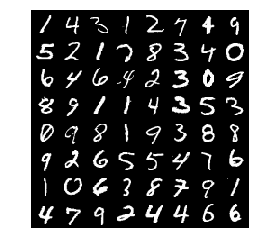

In [7]:
#64개의 이미지를 그리드에 넣어 뿌려봅니다.
#옆에 사람과 보시는 이미지가 다릅니다.
#그 이유는 DataLoader에서 Shuffle=True를 설정했기 때문이죠.
imshow(vutils.make_grid(images))

#### 해봅시다!
1) 이미지에 대응하는 숫자(정답)은 어떤 형태일까요? 숫자가 저장된 텐서를 찍어봅시다.

In [0]:
#TODO hint: 앞서 정답이 저장된 텐서를 무슨 이름의 변수에 할당했었죠?

2) 트레이닝 데이터와 테스트 데이터는 각각 몇개의 데이터포인트를 가지고 있을까요? 찍어봅시다.

In [0]:
#TODO hint: train_dataset의 attribute을 활용해봅시다..

## 딥러닝 모델 설계하기

이제 딥러닝 모델을 만들어볼텐데요, 먼저 가장 단순한 '히든 레이어가 없는' 신경망 모델을 만들어봅시다.

#### 필요한 라이브러리를 가져옵니다.

In [0]:
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

만들 모델의 명세는 다음과 같습니다.

![image](https://docs.google.com/uc?export=download&id=1aWKk8bIJVYJU-sxh5OOZNW_QpueF9yPr =250x)

- 입력 레이어: 784개 뉴런
- 출력 레이어: 10개 뉴런 (0~9)
- 입력-출력을 바로 연결하는 하나의 레이어를 가진 모델.

0부터 9까지 총 10개의 가짓수니까 출력 레이어의 뉴런 수가 10인건 알겠는데, 왜 입력 레이어의 뉴런은 784개일까요?

그 이유는 우리가 가진 개별 이미지의 크기가 28x28이기 때문입니다.

지금 우리가 만들려는 모델은 가장 단순한 모델로, 28x28 이미지를 한줄로 길게 늘어뜨릴 겁니다. 그러면 28x28=784로, 하나의 이미지당 784개의 픽셀값을 얻게 됩니다.

In [11]:
# 이미지 1개의 차원 (1 x 28 x 28)
images[0].size()

torch.Size([1, 28, 28])

In [12]:
# 전체 배치(64개 이미지)는 이렇게 생겼었죠.
images.size()

torch.Size([64, 1, 28, 28])

`.view(원하는 차원)`를 사용하면 텐서를 원하는 차원으로 변형할 수 있습니다. `-1`을 넘기는 차원은 알아서 계산이 됩니다. (배치, 784) 차원으로 바꿔봅시다.

In [13]:
images.view(-1, 784).size()

torch.Size([64, 784])

#### Simple_DNN 구현하기
PyTorch에서 모델을 구현하는 방법은 여럿이 있지만, 클래스를 사용하면 쉽게 모델을 구현할 수 있습니다.

보통 `__init__`과 `forward` 함수를 구현합니다.
- init: 딥러닝 모델에서 사용할 여러 레이어를 정의합니다.
- foward: 실제 연산이 이루어지는 부분으로 정의한 레이어를 사용하여 최종 결과를 반환합니다.

In [0]:
class SimpleDNN(nn.Module):
    def __init__(self):
        super(SimpleDNN, self).__init__()
        # 784 => 10
        self.fc = nn.Linear(784, 10)
         
    def forward(self, inputs):
        # 64x1x28x28 => 64x784
        x = inputs.view(-1, 784)
         
        # fully connected
        x = self.fc(x)
        return x

결과가 어떻게 떨어지는지 확인해볼까요?

In [0]:
# 모델 인스턴스를 하나 만듭니다.
model = SimpleDNN()

In [0]:
# model을 함수처럼 사용하면 .forward()함수가 실행됩니다.
result = model(images)

In [17]:
# 입력한 64개의 이미지들에 대한 0-9까지의 확률값이 반환되었습니다.
result.size()

torch.Size([64, 10])

In [18]:
# 첫번째 결과를 볼까요?
result[0]

tensor([-0.2084, -0.1712, -0.0201,  0.0522,  0.0242,  0.0882,  0.1947,
         0.1191,  0.1059,  0.0657])

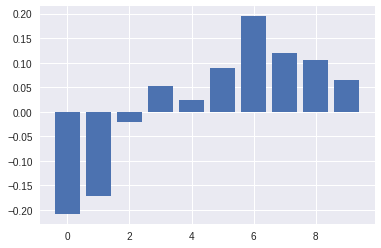

In [19]:
plt.bar(np.arange(0, 10), result[0].data.numpy())
plt.show()

In [20]:
# 가장 확률이 높게 나온 것은... 
# argmax는 가장 높은 값을 지닌 인덱스를 찾아줍니다.
result[0].argmax()

tensor(6)

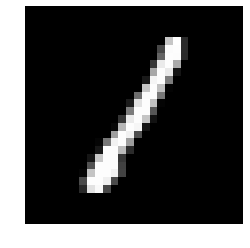

In [21]:
# 하지만 실제 이미지는...
imshow(vutils.make_grid(images[0]))

학습이 전혀되지 않은 상태이니 맞출 수 없는건 당연합니다.  
설계한 모델을 어떻게 학습할지 배워봅시다!

### 해봅시다! 좀더 복잡한 딥 뉴럴네트워크 만들기

이번에는 조금 더 복잡한 모델을 만들어봅시다.
- 입력 레이어: 뉴런 784개
- 히든 레이어1: 뉴런 256개
- 히든 레이어2: 뉴런 32개
- 출력 레이어: 뉴런 10개

![image](https://docs.google.com/uc?export=download&id=1BwN1Ica-76_qot70UQczqqf_DU2SgXRk =250x)

각 히든 레이어 다음에는 relu 액티베이션 함수를 사용합니다.
forward 함수에서 x = F.relu(x)와 같은 형태로 설정합니다.

아래 DNN 클래스에서 히든레이어 2 부분을 채워넣어보세요

In [0]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        
        #TODO hint: nn.Linear(..., ...)
        self.fc2 = None
        
        self.last_layer = nn.Linear(32, 10)
         
    def forward(self, inputs):
        x = inputs.view(-1, 784)
        
        x = self.fc1(x)
        x = F.relu(x)
        
        #TODO
        x = None #fc
        x = None #relu
        
        x = self.last_layer(x)
        return x

In [0]:
model = DNN()

In [24]:
# 에러가 나지 않고 정상적으로 (64, 10) 크기의 텐서가 출력되나요?
try:
    result = model(images)
    print(result.size())
except:
    print("error!")

error!


## 학습 설계하기

### Loss
출력한 값에 대해서 실제 값과의 오차를 계산해야합니다.
오차는 CrossEntropyLoss에 예측값과 실제값을 넘겨서 구하는데,
PyTorch에서는 다음과 같이 어떤 오차함수를 쓸지만 정하면 됩니다.

In [0]:
loss_function = nn.CrossEntropyLoss()

### Optimizer
Loss를 구한다음, Loss를 사용해서 파라미터를 업데이트해야 합니다.
PyTorch에서는 optim을 사용해서 모델 파라미터를 업데이트하는 여러 옵티마이징 함수를 사용할 수 있습니다. 가장 널리 쓰이는 함수 중 하나인 Adam 옵티마이저를 사용해봅시다!

옵티마이저 함수에는 튜닝할 모델의 파라미터와 learning rate를 파라미터로 넘겨줍니다.

In [0]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)

### Metrics

Epoch과 batch를 돌면서 학습을 진행할 것인데요, 그 과정에서 학습이 잘 되고 있는지를 판단해야 할 기준이 필요합니다. 정확한 분류모델은 출력값과 예측값의 오차(loss)가 작은 모델이겠죠? 그리고 모델이 최종적으로 출력하는 숫자와 정답 숫자가 얼마나 같은지를 accuracy를 통해 측정해봅시다.

먼저 학습 도중 발생하는 loss와 accuracy를 편리하게 저장하기 위해 다음과 같은 정보 저장용 클래스를 하나 정의합니다.

In [0]:
class AverageMeter(object):
    def __init__(self):
        self.reset()
        
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
        
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

### 학습시키기

먼저 데이터 배치를 처음부터 끝까지 돌면서 학습하는 함수를 구현해봅시다.

1. loss, accuracy 메트릭을 정의합니다.
2. 모델을 학습 모드로 설정합니다.
3. for loop을 사용해 train_dataloader에서 1개 배치를 가져옵니다.
  - optimizer의 미분값을 초기화합니다.
  - 이미지를 모델에 넣어 예측값을 출력합니다.
  - 예측값과 실제값의 loss를 구합니다.
  - loss를 저장합니다.
  - accuracy를 구하고 accuracy를 저장합니다.
  - 모델 파라미터에 대한 loss의 미분값을 계산합니다.
  - optimizer를 사용해 모델 파라미터를 업데이트합니다.

In [0]:
def train(loader, model, loss_function, optimizer, epoch):
    #loss, accuracy 메트릭을 정의합니다.
    losses = AverageMeter()
    accuracy = AverageMeter()
    
    #모델을 학습 모드로 설정합니다.
    model.train()
    
    for i, (inputs, targets) in enumerate(loader):
        #train_dataloader에서 1개 배치를 가져옵니다.
        #.to(device)로 cpu, gpu 환경으로 경로를 설정합니다.
        #보통 랩탑에는 딥러닝 연산이 가능한 gpu가 없어,
        #기본으로 cpu 환경에서 학습을 수행합니다.
        inputs, targets = inputs.to(device), targets.to(device)
        
        #optimizer의 미분값을 초기화합니다.
        optimizer.zero_grad()
        
        #이미지를 모델에 넣어 예측값을 출력합니다.
        outputs = model(inputs)
        
        #예측값과 실제값의 loss를 구합니다.
        batch_loss = loss_function(outputs, targets)
        
        #loss를 저장합니다.
        #batch_loss가 Tensor이므로 .item()을 써서
        #값만 빼옵니다.
        losses.update(batch_loss.item())
        
        #확률이 가장 높은 숫자를 선택합니다.
        preds = outputs.argmax(dim=1)
        #accuracy를 구합니다.
        batch_accuracy = preds.eq(targets).sum().item() / inputs.size(0)
        #accuracy를 업데이트합니다.
        accuracy.update(batch_accuracy)
        
        #미분값(gradient)를 구합니다.
        batch_loss.backward()
        
        #모델의 파라미터를 업데이트합니다.
        optimizer.step()
        
    #Epoch이 끝나면 loss와 accuracy의 평균값을 출력합니다.
    print('[Epoch: {0:2d}]\t'
          'Loss {losses.avg:.4f}\t'
          'Acc {accuracy.avg:.4f}\t'.format(epoch, losses=losses, accuracy=accuracy))

### 자, 학습을 실행해볼까요?

In [29]:
# SimpleDNN으로 돌려봅시다.
model = SimpleDNN().to(device)  

# loss 함수와 optimizer를 지정합니다.
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

EPOCHS = 5
for epoch in range(EPOCHS):
    # 학습을 수행합니다.
    train(train_loader, model, loss_function, optimizer, epoch)

[Epoch:  0]	Loss 1.3724	Acc 0.7344	
[Epoch:  1]	Loss 0.7142	Acc 0.8520	
[Epoch:  2]	Loss 0.5424	Acc 0.8738	
[Epoch:  3]	Loss 0.4636	Acc 0.8847	
[Epoch:  4]	Loss 0.4181	Acc 0.8918	


## 평가하기
파라미터 최적화에 사용되지 않은 Test 데이터셋을 사용해서 한 에폭이 끝날때마다 모델 성능을 평가하는 함수를 만들어봅시다.

위에서 작성한 train 함수와 매우 유사하지만, 다음과 같은 차이점이 있습니다.

1) 모델이 eval모드임을 지정해줘야 합니다.   
  - model.train() => model.eval()
  
2) 파라미터를 업데이트하지 않으므로, 다음과 같은 내용이 필요없습니다.
  - 미분값을 초기화하거나 업데이트하지않습니다.
  - optimizer가 필요 없습니다.
  
위 명세를 바탕으로 evaluate 함수를 아래에 작성해봅시다.

In [0]:
def evaluate(loader, model, loss_function, epoch):
    losses = AverageMeter()
    accuracy = AverageMeter()
    
    #TODO 모델을 eval 모드로 바꿔줍니다.
    model.train()
    
    #TODO 여기서 필요없는 라인이 3줄이 있습니다. 주석처리해봅시다.
    for i, (inputs, targets) in enumerate(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        
        batch_loss = loss_function(outputs, targets)
        
        losses.update(batch_loss.item())
        
        preds = outputs.argmax(dim=1)
        batch_accuracy = preds.eq(targets).sum().item() / inputs.size(0)
        accuracy.update(batch_accuracy)
        
        batch_loss.backward()
        
        optimizer.step()
        
    #Epoch이 끝나면 loss와 accuracy의 평균값을 출력합니다.
    print('[Val Epoch: {0:2d}]\t'
          'Loss {losses.avg:.4f}\t'
          'Acc {accuracy.avg:.4f}\t'.format(epoch, losses=losses, accuracy=accuracy))

## 전체 학습시키기

In [0]:
# 여러 모델을 돌릴텐데, 매번 같은 데이터를 사용하도록
# 데이터셋을 가져오는 함수를 만듭니다.
def initialize_dataset():
    train_dataset = vdatasets.MNIST(root="data", train=True, transform=transform, download=True)
    test_dataset = vdatasets.MNIST(root="data", train=False, transform=transform, download=True)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True)
    
    return train_loader, test_loader

In [34]:
# 데이터셋을 초기화합니다.
train_loader, test_loader = initialize_dataset()

# 모델을 지정합니다. 기본 모델인 SimpleDNN으로 해보겠습니다.
model = SimpleDNN().to(device)  

# loss 함수와 optimizer를 지정합니다.
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 학습을 5에폭 돌리겠습니다.
EPOCHS = 5
for epoch in range(EPOCHS):
    # 학습을 수행합니다.
    train(train_loader, model, loss_function, optimizer, epoch)
    
    # 검증을 수행합니다.
    evaluate(test_loader, model, loss_function, epoch)

[Epoch:  0]	Loss 1.3628	Acc 0.7411	
[Val Epoch:  0]	Loss 0.8495	Acc 0.8472	
----------
[Epoch:  1]	Loss 0.7124	Acc 0.8530	
[Val Epoch:  1]	Loss 0.5780	Acc 0.8762	
----------
[Epoch:  2]	Loss 0.5420	Acc 0.8737	
[Val Epoch:  2]	Loss 0.4725	Acc 0.8903	
----------
[Epoch:  3]	Loss 0.4633	Acc 0.8851	
[Val Epoch:  3]	Loss 0.4172	Acc 0.8978	
----------
[Epoch:  4]	Loss 0.4182	Acc 0.8923	
[Val Epoch:  4]	Loss 0.3828	Acc 0.9032	
----------


#### 해봅시다!
SimpleDNN으로도 높은 accuracy가 나옵니다. 와...그럼 아까 만들었던 더 복잡한 DNN으로는 어떤 결과가 나올까요? 위 코드를 참조해서 DNN의 결과를 돌려봅시다.

In [0]:
#TODO DNN으로 모델을 만들고, Epoch을 5번 돌려봅시다.

## CNN 만들어보기
- CNN은 필터(커널)을 사용해서 픽셀의 상하좌우, 채널간 관계를 학습하는 방식으로 이미지 처리에 뛰어난 성능을 보입니다.
- 따라서 이전 DNN 모델처럼 입력 이미지를 `.view()`함수를 써서 변환할 필요가 없습니다.
- 이번에는 다음과 같은 방식으로 모델을 만들어봅시다.
  - input > conv1 > relu > pool > conv2 > relu > pool > flatten > fc1 > fc2 
  - conv1의 입력채널은 1 (그레이스케일) 출력채널은 32, 필터 사이즈는 3x3으로 합니다.
  - pool은 모두 kernel_size=2, stride=2로 합니다.
  - conv2의 입력 채널은 32, 출력 채널은 64, 필터 사이즈는 3x3으로 합니다.
  - 두번째 풀링이 끝나면 (배치사이즈, -1)로 flatten을 수행합니다.
  - fc1의 입력 뉴런 수는 1600, 출력 뉴런수는 1024로 합니다.
  - fc2의 입력 뉴런 수는 1024, 출력 뉴런수는 10으로 합니다.
  
  ![image](https://docs.google.com/uc?export=download&id=1EZfQy8usvPMLsSPC_eARjN3bSaIovOsX =250x)


In [0]:
#TODO: CNN 만들기
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        
        #TODO: conv2
        self.conv2 = None
        self.fc1 = nn.Linear(1600, 1024)
        
        #TODO: fc2
        self.fc2 = None
        
    def forward(self, inputs):
        
        # 1st conv 
        x = self.conv1(inputs)
        x = F.relu(x)
        x = self.pool(x)
        
        #TODO: 2nd conv
        x = None #conv2
        x = None #ReLU
        x = None #pool
        
        x = x.view(inputs.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [35]:
# 데이터셋을 초기화합니다.
train_loader, test_loader = initialize_dataset()

# 모델을 지정합니다. 기본 모델인 SimpleDNN으로 해보겠습니다.
model = CNN().to(device)

# loss 함수와 optimizer를 지정합니다.
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 학습을 5에폭 돌리겠습니다.
EPOCHS = 5
for epoch in range(EPOCHS):
    # 학습을 수행합니다.
    train(train_loader, model, loss_function, optimizer, epoch)
    
    # 검증을 수행합니다.
    evaluate(test_loader, model, loss_function, epoch)

[Epoch:  0]	Loss 0.3720	Acc 0.9045	
[Val Epoch:  0]	Loss 0.1119	Acc 0.9678	
----------
[Epoch:  1]	Loss 0.0998	Acc 0.9706	
[Val Epoch:  1]	Loss 0.0663	Acc 0.9808	
----------
[Epoch:  2]	Loss 0.0695	Acc 0.9793	
[Val Epoch:  2]	Loss 0.0491	Acc 0.9844	
----------
[Epoch:  3]	Loss 0.0542	Acc 0.9835	
[Val Epoch:  3]	Loss 0.0497	Acc 0.9843	
----------
[Epoch:  4]	Loss 0.0455	Acc 0.9862	
[Val Epoch:  4]	Loss 0.0447	Acc 0.9857	
----------


## 모델 저장하기
PyTorch에서 권장하는 방식은 모델의 파라미터만 저장하는 것입니다.
https://pytorch.org/docs/master/notes/serialization.html#recommend-saving-models

In [0]:
torch.save(model.state_dict(), "best_model.pth.tar")

## 모델 불러오기
클래스를 사용해 새로운 모델 인스턴스를 생성한다음,
`torch.load` 함수와 `load_state_dict` 함수를 사용해서 파라미터를 읽어들입니다.

In [0]:
new_cnn = CNN()
new_cnn.load_state_dict(torch.load("best_model.pth.tar"))

### 내 글씨를 분류해보자!
자, 이제 새로운 데이터를 한번 넣어볼까요?
https://sketch.io/sketchpad/ 에서 나만의 숫자 글씨를 써본다음,
숫자가 한가운데 오도록 crop하고 다운로드합니다.
그리고 주피터 노트북에서 읽을 수 있도록, 도커 컨테이터와 연결된 디렉토리에 집어넣습니다.
이 과정이 귀찮다면 제가 쓴 숫자를 읽어봅시다.

In [38]:
import PIL
PIL.__version__

'5.1.0'

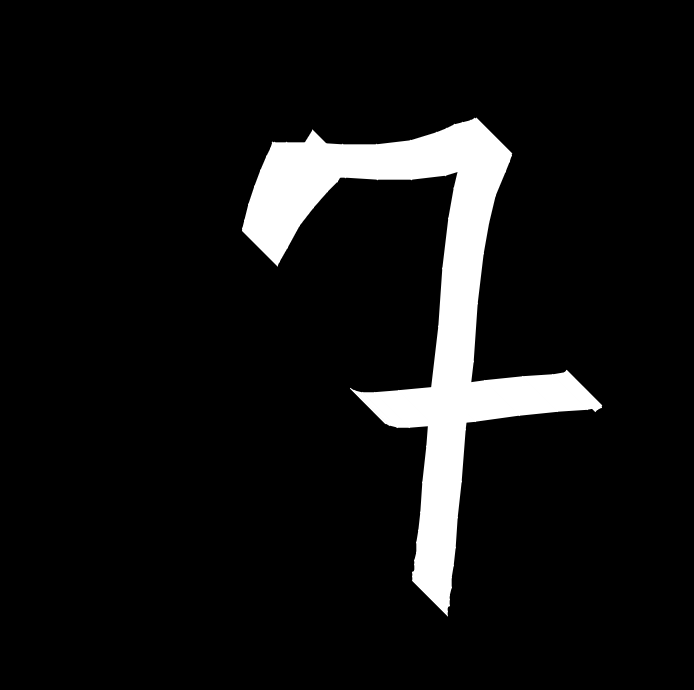

In [39]:
# 제가 쓴 숫자 2입니다.
my_image = PIL.Image.open("pytorch_jupyter/img/mnist_7.png").convert("L")
my_image

In [0]:
# 간단한 predict함수를 만들었습니다.
def predict(model, img):
    model.eval()
    
    # 맨위에서 설정한 transform 파이프라인 함수입니다.
    # PIL 이미지를 28x28 사이즈로 바꾸고 숫자로 변환합니다.
    my_image_tensor = transform(img)
    
    # 위에서는 batch_size가 64였는데, 여기는 1개라서
    # 배치 차원이 없습니다. 0번째 차원을 추가해줍니다.
    tensor = my_image_tensor.unsqueeze(0)
    
    # 모델이 무슨 숫자로 읽었는지 출력합니다.
    print(model(tensor).argmax(dim=1).item())

In [41]:
predict(new_cnn, my_image)

7


### 해봅시다!

이번에는 여러분이 만든 손글씨를 넣어 predict 함수에 넣고 실행해봅시다.
바로 아래 셀을 실행시키고 업로드 버튼을 눌러 여러분의 손글씨 이미지를 넣어보아요.
현재 디렉토리에 바로 올라가기 때문에 "filename.png" 등으로 바로 접근할 수 있습니다.

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mnist_7.png to mnist_7.png
User uploaded file "mnist_7.png" with length 24845 bytes


In [0]:
#TODO
#predict(...)

### 성공했습니다!
제가 오늘 준비한 내용은 여기까지입니다. 짧은 시간 들으시느라 고생많으셨습니다.
간단한 DNN, CNN 모델을 만들어보았는데요, 여러 하이퍼파라미터를 변형해보시면 또 재미있는 결과를 얻으실 수 있을 것 같습니다.
문제가 생기면 언제든 도커 이미지로 다시 컨테이너를 생성하시면 원본 주피터 노트북을 얻으실 수 있을 겁니다.
세션 내용 관련해서 궁금한 점이 있으시면 언제든 황준식[junsik.whang@nexon.co.kr]로 문의주십시오-

또 딥러닝 관련해서 더 공부하시려면 다음과 같은 강좌를 추천합니다.
- Coursera.org https://www.coursera.org/learn/neural-networks-deep-learning/home/welcome
- Sirag Raval https://www.youtube.com/results?search_query=siraj+raval

감사합니다!

## E.O.D

## Answers

### 손글씨 데이터셋 살펴보기

In [0]:
labels

In [0]:
print(train_dataset.train_labels.size())
print(test_dataset.test_labels.size())

### 딥러닝 모델 설계하기

In [0]:
# ANSWER
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        
        #TODO
        self.fc2 = nn.Linear(256, 32)
        
        self.last_layer = nn.Linear(32, 10)
         
    def forward(self, inputs):
        x = inputs.view(-1, 784)
        
        x = self.fc1(x)
        x = F.relu(x)
        
        #TODO
        x = self.fc2(x)
        x = F.relu(x)
        
        x = self.last_layer(x)
        return x

### 평가 함수 만들기

In [0]:
def evaluate(loader, model, loss_function, epoch):
    losses = AverageMeter()
    accuracy = AverageMeter()
    
    model.eval()
    
    for i, (inputs, targets) in enumerate(loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        outputs = model(inputs)
        batch_loss = loss_function(outputs, targets)
        
        losses.update(batch_loss.item())
        
        preds = outputs.argmax(dim=1)
        batch_accuracy = preds.eq(targets).sum().item() / inputs.size(0)
        accuracy.update(batch_accuracy)
        
    print('[Val Epoch: {0:2d}]\t'
          'Loss {losses.avg:.4f}\t'
          'Acc {accuracy.avg:.4f}\t'.format(epoch, losses=losses, accuracy=accuracy))
    print("-" * 10)

### 전체 학습시키기

In [0]:
# 데이터셋을 초기화합니다.
train_loader, test_loader = initialize_dataset()

# 모델을 지정합니다.DNN으로 해보겠습니다.
model = DNN()    

# loss 함수와 optimizer를 지정합니다.
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 학습을 5에폭 돌리겠습니다.
EPOCHS = 5
for epoch in range(EPOCHS):
    # 학습을 수행합니다.
    train(train_loader, model, loss_function, optimizer, epoch)
    
    # 검증을 수행합니다.
    evaluate(test_loader, model, loss_function, epoch)

### CNN 만들기

In [0]:
#TODO: CNN 만들기
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(1600, 1024)
        self.fc2 = nn.Linear(1024, 10)

    def forward(self, inputs):
        
        # 1st conv 
        x = self.conv1(inputs)
        x = F.relu(x)
        x = self.pool(x)
        
        #TODO: 2nd conv
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = x.view(inputs.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x